## Importing Libraries

Lets import some libraries and get started 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt


### The Data

In [2]:
severity_data = pd.read_csv('Data-Collisions.csv')
severity_data.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
severity_data['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [4]:
severity_data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
severity_data.LOCATION.unique()

array(['5TH AVE NE AND NE 103RD ST',
       'AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N',
       '4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST', ...,
       '47TH AVE SW AND SW 98TH ST', 'NE PARK RD AND NE RAVENNA WB BV',
       'PUGET BLVD SW BETWEEN SW HUDSON ST AND DEAD END 1'], dtype=object)

In [6]:
severity_data.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [7]:
severity_data.shape

(194673, 38)

In [8]:
severity_data.info

<bound method DataFrame.info of         SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
0                  2 -122.323148  47.703140         1    1307       1307   
1                  1 -122.347294  47.647172         2   52200      52200   
2                  1 -122.334540  47.607871         3   26700      26700   
3                  1 -122.334803  47.604803         4    1144       1144   
4                  2 -122.306426  47.545739         5   17700      17700   
...              ...         ...        ...       ...     ...        ...   
194668             2 -122.290826  47.565408    219543  309534     310814   
194669             1 -122.344526  47.690924    219544  309085     310365   
194670             2 -122.306689  47.683047    219545  311280     312640   
194671             2 -122.355317  47.678734    219546  309514     310794   
194672             1 -122.289360  47.611017    219547  308220     309500   

       REPORTNO   STATUS      ADDRTYPE   INTKEY  ... RO

In [9]:
severity_data.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [10]:
# to get statistical summary of categorical variables
severity_data.describe(include='O')

,REPORTNO,STATUS,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYDESC,COLLISIONTYPE,INCDATE,INCDTTM,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
count,194673,194673,192747,191996,84811,5638,194673,189769,194673,194673,...,29805,189789,189592,189661,189503,4667,9333,194655,189769,194673
unique,194670,2,3,24102,2,1,2,10,5985,162058,...,1,4,11,9,9,1,1,115,62,2
top,1782439,Matched,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,,"Not Enough Information, or Insufficient Locati...",Property Damage Only Collision,Parked Car,2006/11/02 00:00:00+00,11/2/2006,...,Y,N,Clear,Dry,Daylight,Y,Y,32,One parked--one moving,N
freq,2,189786,126926,276,79173,5638,136485,47987,96,96,...,29805,100274,111135,124510,116137,4667,9333,27612,44421,187457


## Data Cleaning 

In [11]:
severity_data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [12]:
# setting index to "INCKEY"
severity_data2=severity_data.set_index("INCKEY")


#### Handling Missing values

In [13]:
missing_data = severity_data2.isnull().sum()
missing_data

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

<AxesSubplot:ylabel='INCKEY'>

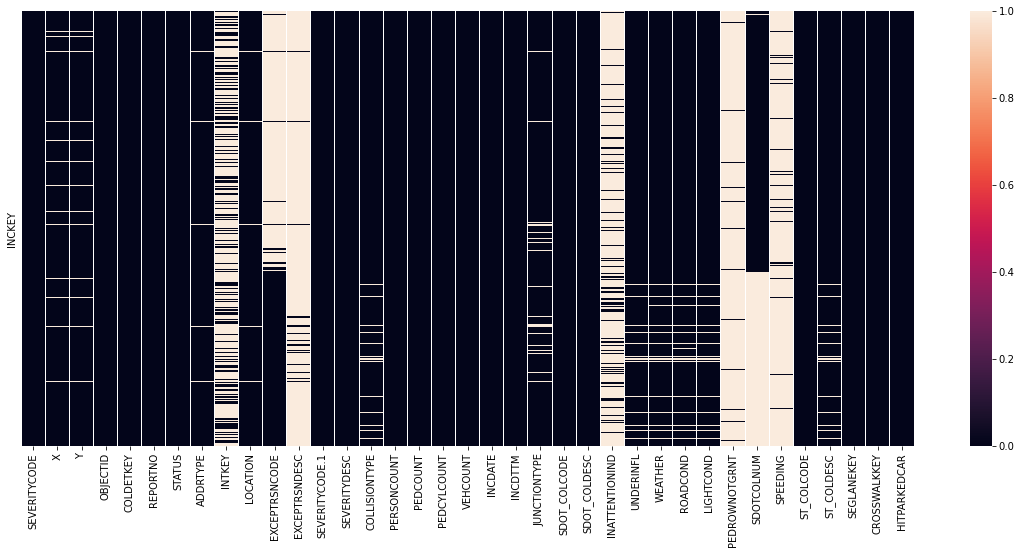

In [14]:
# using seaborns heatmap to plot missin values
plt.figure(figsize=(20,8))
sns.heatmap(severity_data2.isnull(),yticklabels=False)

From the above figure we can conclude that the location coordinates **'X','Y'** values miss at the same time, **'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND'** and **'COLLISIONTYPE'** values miss at the same time, the other values miss at random.

There are some features such as **'EXCEPTRSNCODE','EXCEPTRSNDESC','SDOTCOLNUM', 'SPEEDING'** etc., are not useful for our model because they have so many missing values, hence these features will be dropped .

In [15]:
#Drop the unnecessary columns
severity_data3 = severity_data2.drop(['OBJECTID','COLDETKEY','REPORTNO','STATUS','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','INCDTTM','SDOT_COLDESC','INATTENTIONIND','PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY'],axis=1)
severity_data3.shape

(194673, 19)

In [16]:
# drop missing values
severity_data3 = severity_data3.dropna(axis=0)
severity_data3.shape

(180067, 19)

In [17]:
severity_data3.reset_index(drop=True, inplace=True)

In [18]:
# Check uf theres any missing values
severity_data3.isnull().sum()

SEVERITYCODE     0
X                0
Y                0
ADDRTYPE         0
SEVERITYDESC     0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
INCDATE          0
JUNCTIONTYPE     0
SDOT_COLCODE     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLCODE       0
HITPARKEDCAR     0
dtype: int64

Unnecessary data has been removed and now we have no missing values!

### Converting dataypes

In [19]:
severity_data3.dtypes

SEVERITYCODE       int64
X                float64
Y                float64
ADDRTYPE          object
SEVERITYDESC      object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDATE           object
JUNCTIONTYPE      object
SDOT_COLCODE       int64
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
ST_COLCODE        object
HITPARKEDCAR      object
dtype: object

Data types for **'SDOT_COLCODE'** and **'INCDATE'** needs to be changed

In [20]:
#changing data type for 'SDOT_COLCODE'and 'INCDATE'
severity_data3[["SDOT_COLCODE"]] = severity_data3[["SDOT_COLCODE"]].astype("int")
severity_data3[["ST_COLCODE"]] = severity_data3[["ST_COLCODE"]].astype("int")
severity_data3['INCDATE'] = pd.to_datetime(severity_data3['INCDATE'])

In [21]:
#Extracting 'Year', 'Month', 'Weekday' from column 'INCDATE'
from datetime import date
severity_data3['YEAR'], severity_data3['MONTH'], severity_data3["WEEKDAY"]= severity_data3['INCDATE'].dt.year, severity_data3['INCDATE'].dt.month, severity_data3['INCDATE'].dt.weekday
severity_data3.dtypes


SEVERITYCODE                   int64
X                            float64
Y                            float64
ADDRTYPE                      object
SEVERITYDESC                  object
COLLISIONTYPE                 object
PERSONCOUNT                    int64
PEDCOUNT                       int64
PEDCYLCOUNT                    int64
VEHCOUNT                       int64
INCDATE          datetime64[ns, UTC]
JUNCTIONTYPE                  object
SDOT_COLCODE                   int64
UNDERINFL                     object
WEATHER                       object
ROADCOND                      object
LIGHTCOND                     object
ST_COLCODE                     int64
HITPARKEDCAR                  object
YEAR                           int64
MONTH                          int64
WEEKDAY                        int64
dtype: object

## Exploratory Data Analysis(EDA)

In [22]:
severity_data3["UNDERINFL"]=severity_data3["UNDERINFL"].replace("N", "0")
severity_data3["UNDERINFL"]=severity_data3["UNDERINFL"].replace("Y", "1")
severity_data3['UNDERINFL'].value_counts()

0    171250
1      8817
Name: UNDERINFL, dtype: int64

Lets visualize our data to get more insights!

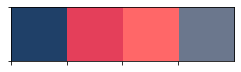

In [23]:
flatui = ["#1f4068","#e43f5a","#ff6768","#6b778d"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

In [24]:
severity_data3.head()

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR,YEAR,MONTH,WEEKDAY
0,2,-122.323148,47.703140,Intersection,Injury Collision,Angles,2,0,0,2,...,11,0,Overcast,Wet,Daylight,10,N,2013,3,2
1,1,-122.347294,47.647172,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,...,16,0,Raining,Wet,Dark - Street Lights On,11,N,2006,12,2
2,1,-122.334540,47.607871,Block,Property Damage Only Collision,Parked Car,4,0,0,3,...,14,0,Overcast,Dry,Daylight,32,N,2004,11,3
3,1,-122.334803,47.604803,Block,Property Damage Only Collision,Other,3,0,0,3,...,11,0,Clear,Dry,Daylight,23,N,2013,3,4
4,2,-122.306426,47.545739,Intersection,Injury Collision,Angles,2,0,0,2,...,11,0,Raining,Wet,Daylight,10,N,2004,1,2


In [25]:
severity_data3['ADDRTYPE'].value_counts()

Block           117085
Intersection     62982
Name: ADDRTYPE, dtype: int64

Text(0, 0.5, 'Number Of Incidents ')

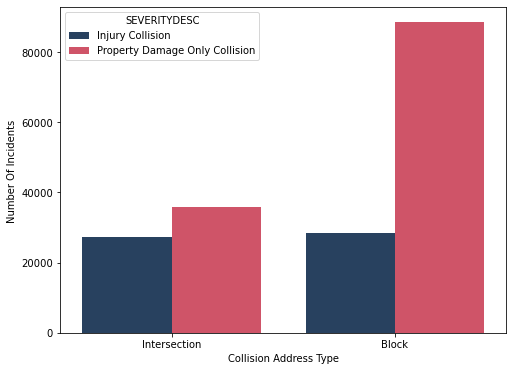

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x='ADDRTYPE', hue = 'SEVERITYDESC',data=severity_data3)
plt.xlabel("Collision Address Type")
plt.ylabel("Number Of Incidents ")

Text(0, 0.5, 'Number Of Incidents ')

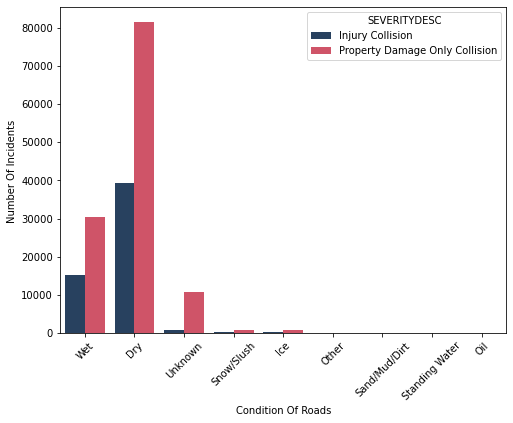

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x='ROADCOND',hue = 'SEVERITYDESC',data=severity_data3)
plt.xticks(rotation=45)
plt.xlabel("Condition Of Roads")
plt.ylabel("Number Of Incidents ")

Text(0, 0.5, 'Number Of Incidents ')

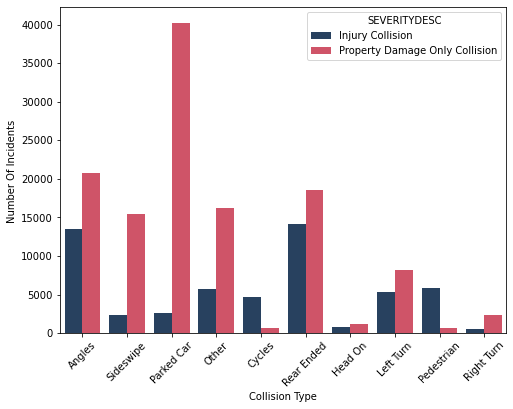

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x= "COLLISIONTYPE",hue = 'SEVERITYDESC', data = severity_data3)
plt.xticks(rotation=45)
plt.xlabel("Collision Type")
plt.ylabel("Number Of Incidents ")

Text(0, 0.5, 'Number Of Incidents ')

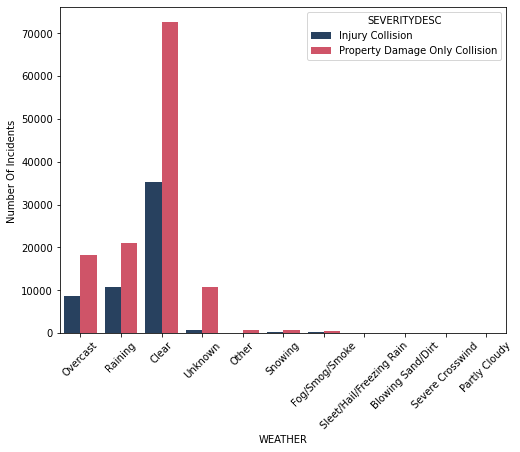

In [29]:
plt.figure(figsize=(8,6))
chart=sns.countplot(x= "WEATHER",hue = 'SEVERITYDESC', data = severity_data3, palette=flatui)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.ylabel("Number Of Incidents ")

Text(0, 0.5, 'Number Of Incidents ')

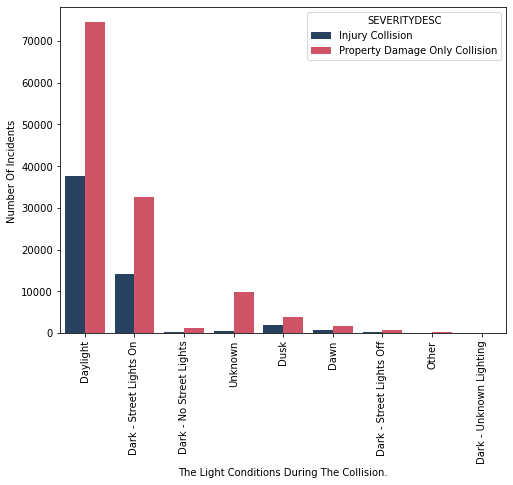

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(x='LIGHTCOND',hue = 'SEVERITYDESC',data=severity_data3)
plt.xticks(rotation=90)
plt.xlabel("The Light Conditions During The Collision.")
plt.ylabel("Number Of Incidents ")

Text(0, 0.5, 'Number Of Incidents ')

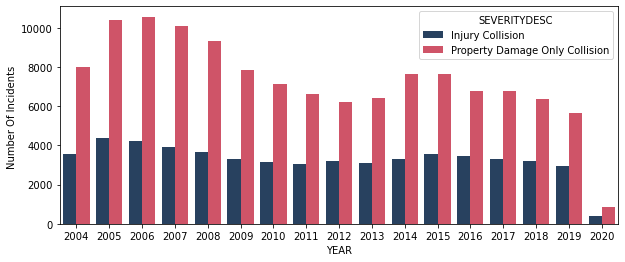

In [31]:
plt.figure(figsize=(10,4))
sns.countplot(x='YEAR',hue = 'SEVERITYDESC',data=severity_data3)
plt.ylabel("Number Of Incidents ")

Text(0, 0.5, 'Number Of Incidents ')

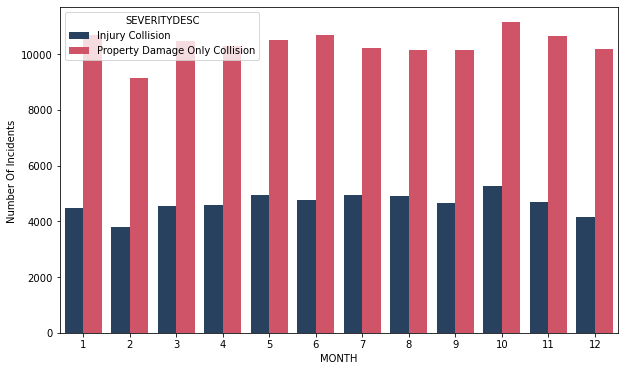

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x='MONTH',hue = 'SEVERITYDESC',data=severity_data3)
plt.ylabel("Number Of Incidents ")

Text(0, 0.5, 'Number Of Incidents ')

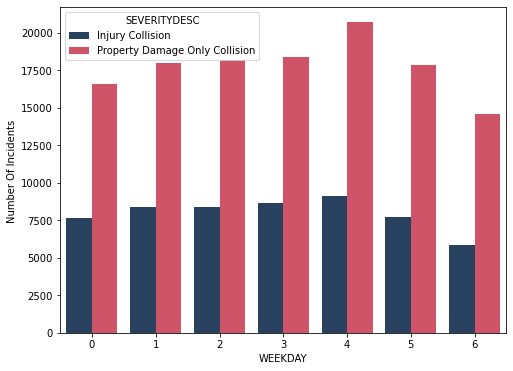

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(x='WEEKDAY',hue = 'SEVERITYDESC',data=severity_data3)
plt.ylabel("Number Of Incidents ")

Text(0, 0.5, 'Number Of Incidents ')

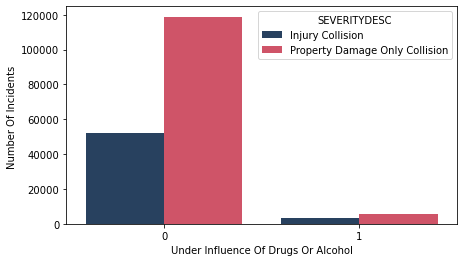

In [34]:
plt.figure(figsize=(7,4))
sns.countplot(x='UNDERINFL',hue = 'SEVERITYDESC',data=severity_data3)
plt.xlabel("Under Influence Of Drugs Or Alcohol")
plt.ylabel("Number Of Incidents ")

Text(0, 0.5, 'Number Of Incidents ')

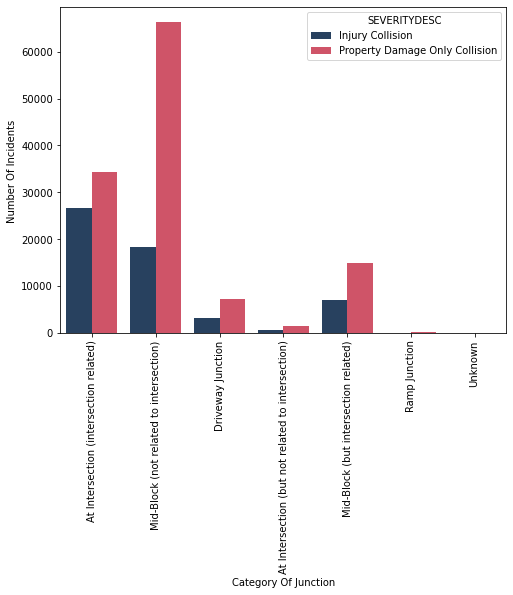

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(x='JUNCTIONTYPE',hue = 'SEVERITYDESC',data=severity_data3)
plt.xticks(rotation=90)
plt.xlabel("Category Of Junction")
plt.ylabel("Number Of Incidents ")

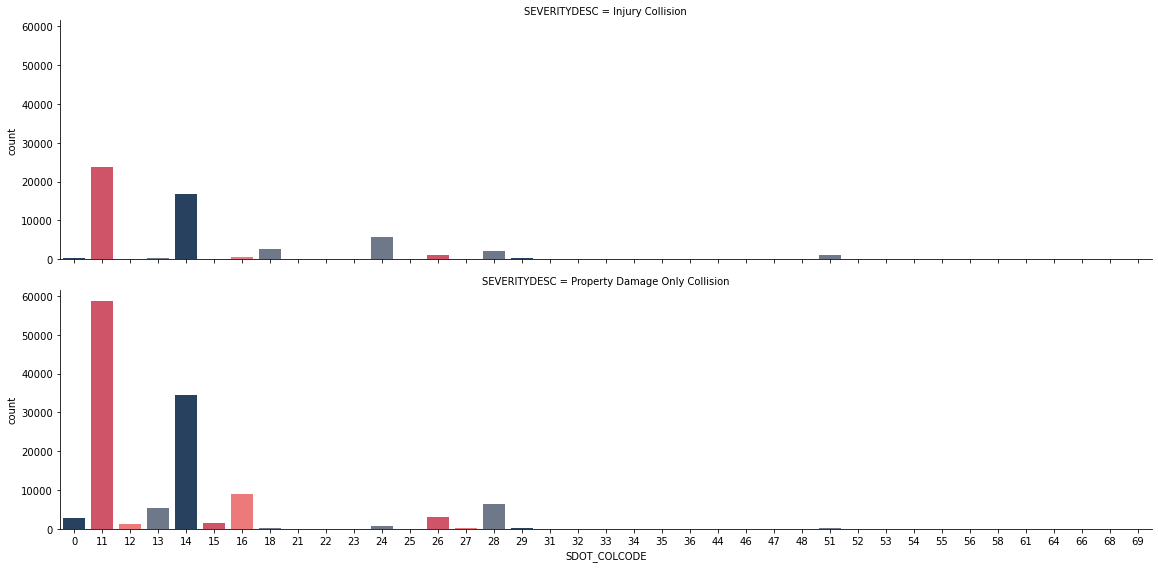

In [36]:
sns.catplot(x = "SDOT_COLCODE", data=severity_data3, kind = "count",  row= "SEVERITYDESC",aspect=4,height=4, palette=flatui)

In [37]:
severity_data3['ST_COLCODE'].value_counts()

32    39408
10    34353
14    24925
11    12178
50    12157
      ...  
43        2
87        2
60        1
49        1
85        1
Name: ST_COLCODE, Length: 62, dtype: int64

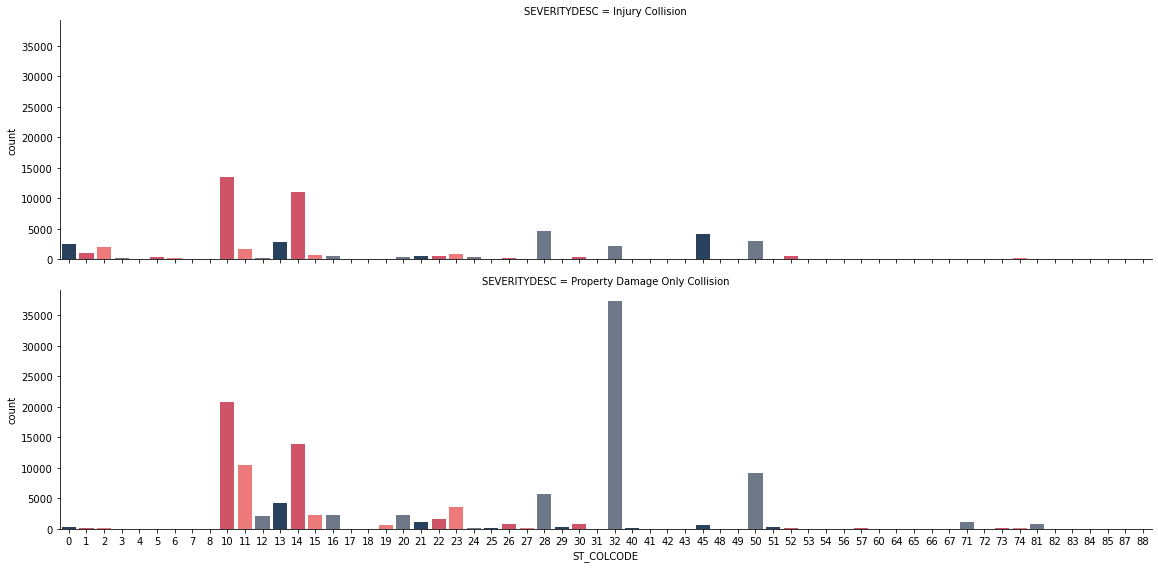

In [38]:
sns.catplot(x = "ST_COLCODE", data = severity_data3, kind = "count",  row= "SEVERITYDESC",aspect=4,height=4,palette=flatui)

Text(0, 0.5, 'Count of Incidents')

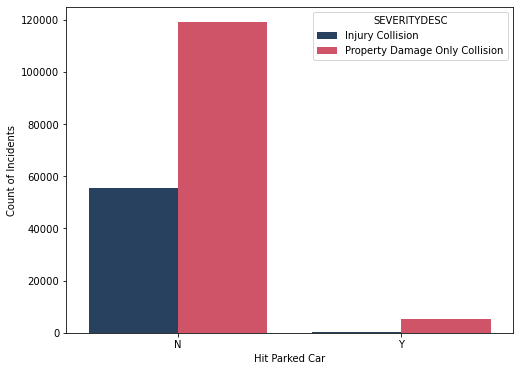

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(x='HITPARKEDCAR',hue = 'SEVERITYDESC',data=severity_data3)
plt.xlabel("Hit Parked Car")
plt.ylabel("Count of Incidents")

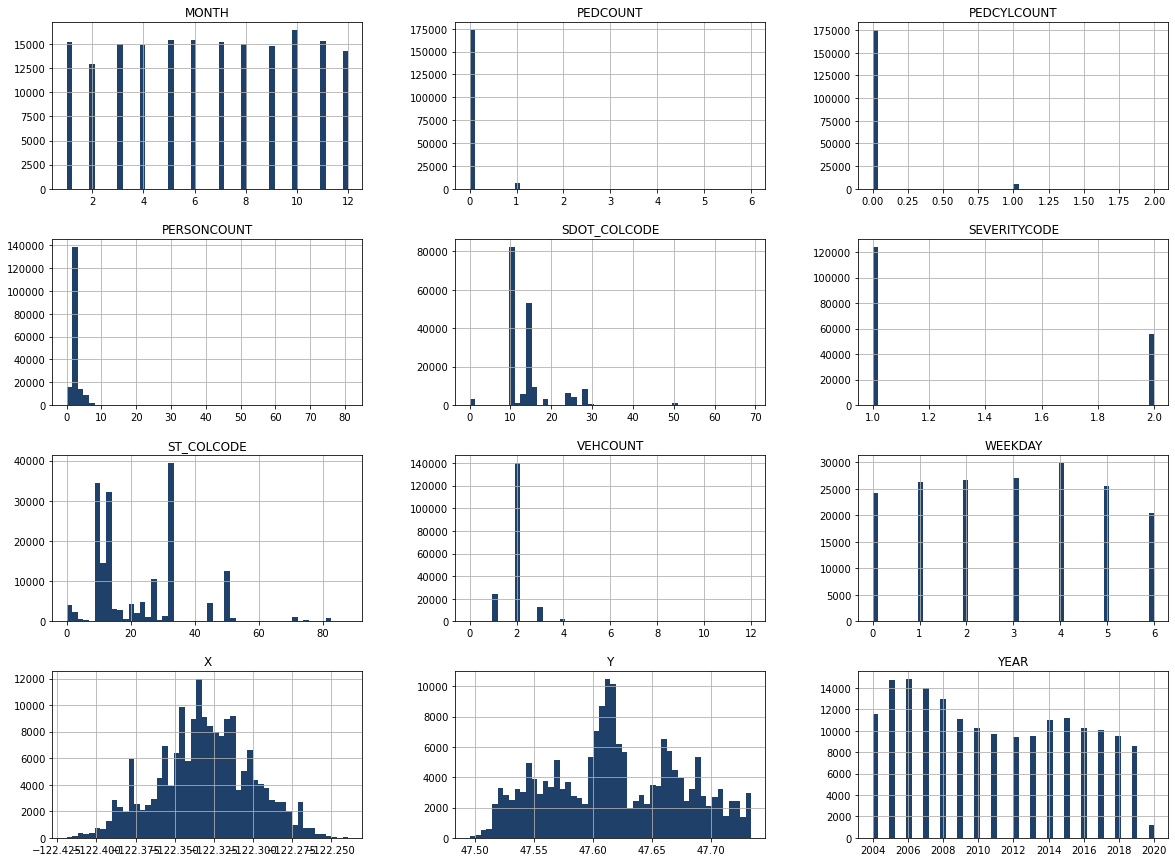

In [40]:
severity_data3.hist(bins=50, figsize=(20,15))
plt.show()

Text(0, 0.5, 'Latitude')

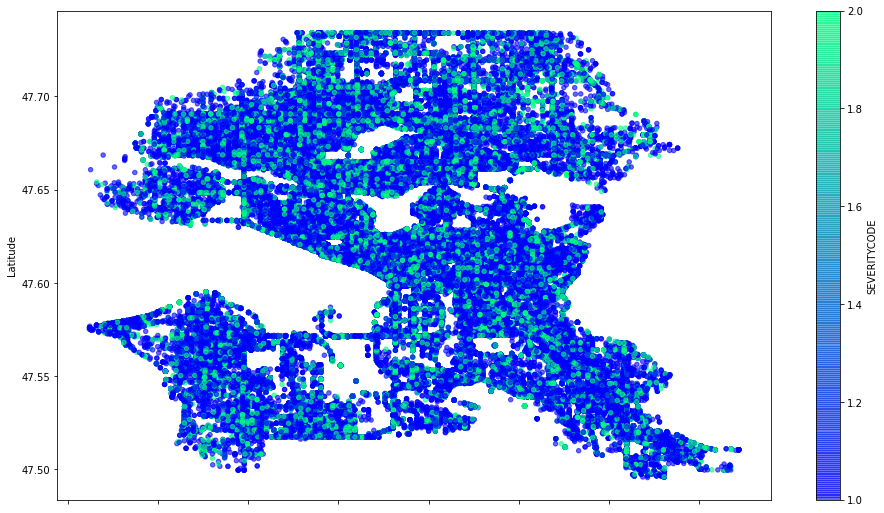

In [41]:
fig = severity_data3.plot(kind="scatter", x="X", y="Y", alpha=0.6,
                   figsize=(16,9),c="SEVERITYCODE",cmap=plt.get_cmap("winter"),colorbar=True,)
plt.title("")
plt.xlabel("")
plt.ylabel("Latitude")

In [42]:
severity_data3.corr()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,ST_COLCODE,YEAR,MONTH,WEEKDAY
SEVERITYCODE,1.000000,0.009376,0.019453,0.124056,0.246640,0.214972,-0.084710,0.167126,-0.157177,0.034455,0.005984,-0.018646
X,0.009376,1.000000,-0.160256,0.012834,0.010829,-0.002093,-0.015696,0.009627,-0.023053,0.011267,-0.000274,-0.008733
Y,0.019453,-0.160256,1.000000,-0.013937,0.010783,0.027070,0.020340,-0.018722,-0.028212,-0.025682,0.006579,-0.005653
PERSONCOUNT,0.124056,0.012834,-0.013937,1.000000,-0.027883,-0.043511,0.394979,-0.165458,-0.204823,-0.051569,-0.000849,0.059071
PEDCOUNT,0.246640,0.010829,0.010783,-0.027883,1.000000,-0.018946,-0.321795,0.279085,-0.265919,0.032096,0.005523,-0.021506
PEDCYLCOUNT,0.214972,-0.002093,0.027070,-0.043511,-0.018946,1.000000,-0.311533,0.412626,0.205637,0.041288,0.007543,-0.026393
VEHCOUNT,-0.084710,-0.015696,0.020340,0.394979,-0.321795,-0.311533,1.000000,-0.493297,-0.228328,-0.015733,-0.003947,0.006272
SDOT_COLCODE,0.167126,0.009627,-0.018722,-0.165458,0.279085,0.412626,-0.493297,1.000000,0.328379,-0.015913,0.003862,0.006766
ST_COLCODE,-0.157177,-0.023053,-0.028212,-0.204823,-0.265919,0.205637,-0.228328,0.328379,1.000000,-0.047348,0.003331,0.031362
YEAR,0.034455,0.011267,-0.025682,-0.051569,0.032096,0.041288,-0.015733,-0.015913,-0.047348,1.000000,-0.005452,-0.012391


<AxesSubplot:>

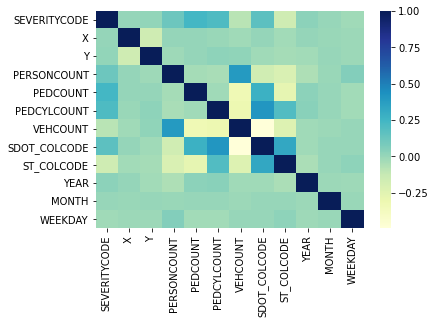

In [43]:
sns.heatmap(severity_data3.corr(),  cmap="YlGnBu")

## Model Building

In [620]:
state = np.random.RandomState(42)

In [621]:
# choose relevant columns 
pd.set_option('display.max_columns', None)
severity_data3.columns

ML_model = severity_data3[['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE','COLLISIONTYPE',
       'PERSONCOUNT','VEHCOUNT','JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'ST_COLCODE', 'HITPARKEDCAR']]

In [622]:
# get dummy data 
ML_dum=pd.get_dummies(ML_model)
ML_dum.shape

(180067, 58)

In [623]:
ML_dum.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,VEHCOUNT,ST_COLCODE,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,UNDERINFL_0,UNDERINFL_1,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,HITPARKEDCAR_N,HITPARKEDCAR_Y
0,2,-122.323148,47.703140,2,2,10,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1,-122.347294,47.647172,2,2,11,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,1,-122.334540,47.607871,4,3,32,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,-122.334803,47.604803,3,3,23,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,2,-122.306426,47.545739,2,2,10,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [624]:
Y = ML_dum['SEVERITYCODE']
X = ML_dum.drop('SEVERITYCODE', axis=1)
print(X.shape,Y.shape)

(180067, 57) (180067,)


## Model Selection & Evaluation

### Logistic Regression

Lets build our model using LogisticRegression from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers.

#### Handling imbalanced Dataset

Our dataset is highly imbalanced and it may affect the predcition ability of this model, Hence we will use **ibmlearn** library to resample our dataset using different methods and choose the best one.

In [625]:
Injury = ML_dum[ML_dum['SEVERITYCODE']==2]
Property = ML_dum[ML_dum['SEVERITYCODE']==1]

In [626]:
print(Injury.shape, Property.shape)

(55809, 58) (124258, 58)


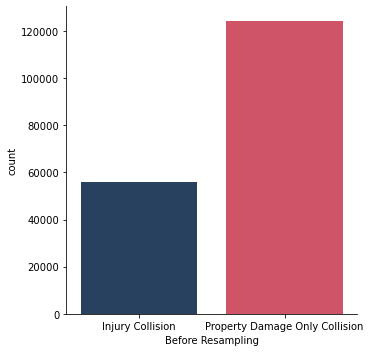

In [627]:
# Count plot to show the imbalanced dataset
ax = sns.catplot(x = "SEVERITYDESC", data = severity_data3, kind = "count")
ax.set(xlabel='Before Resampling')

In [628]:
#imprt libraries over sampling
#!pip install imblearn
#!pip3 install imblearn
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

Choosing different sampling methods

In [629]:
# NearMiss for undersampling
nr = NearMiss()
nr_X, nr_Y = nr.fit_sample(X,Y)

# OverSampling using SMOTE
#smt = SMOTE()
#smt_X, smt_Y = smt.fit_sample(X,Y)

In [630]:
print(nr_X.shape, nr_Y.shape)
#print(smt_X.shape, smt_Y.shape)

(111618, 57) (111618,)


In [631]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(nr_Y)))
#print('Resampled dataset shape {}'.format(Counter(smt_Y)))

Original dataset shape Counter({1: 124258, 2: 55809})
Resampled dataset shape Counter({1: 55809, 2: 55809})


2    55809
1    55809
Name: SEVERITYCODE, dtype: int64
(111618, 58)


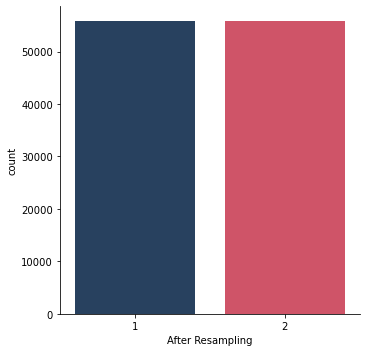

In [632]:
#After re-sampling
ML_df = pd.concat([nr_X, nr_Y], axis=1)
#ML_df = pd.concat([smt_X, smt_Y], axis=1)
ax1 = sns.catplot(x = "SEVERITYCODE", data = ML_df, kind = "count")
ax1.set(xlabel="After Resampling")
print(ML_df.SEVERITYCODE.value_counts())
print(ML_df.shape)

#### Spilting our dataset

In [642]:
# train test split 
from sklearn.model_selection import train_test_split

X = ML_df.drop('SEVERITYCODE', axis=1)
y = ML_df.SEVERITYCODE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (78132, 57) (78132,)
Test set: (33486, 57) (33486,)


<hr>

<div id="evaluation">
    <h2>Modeling</h2>
    let's import LogisticRegression and model our dataset
</div>

In [643]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

<hr>

<div id="evaluation">
    <h2>Prediction</h2>
    let's predict our data and store it in the variables yhat & yhat_prob
</div>

In [644]:
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
yhat[0:5]
yhat_prob[0:5]

array([[0.80116153, 0.19883847],
       [0.62741563, 0.37258437],
       [0.50414587, 0.49585413],
       [0.67266912, 0.32733088],
       [0.67537954, 0.32462046]])

In [645]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.80116153, 0.19883847],
       [0.62741563, 0.37258437],
       [0.50414587, 0.49585413],
       ...,
       [0.4426135 , 0.5573865 ],
       [0.22760312, 0.77239688],
       [0.87395614, 0.12604386]])

<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>different evaluation methods</b> from sklearn and check the accuracy of our model.
</div>

In [646]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.5661116552399609

[Text(0, 0.5, 'Property'), Text(0, 1.5, 'Injury')]

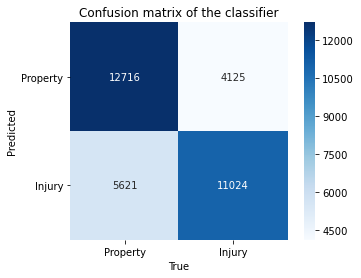

In [647]:
#Confusion matrix plotting
from sklearn.metrics import confusion_matrix
labels = ['Property', 'Injury']
cm=confusion_matrix(y_test, yhat)
axes=sns.heatmap(cm, square=True, annot=True,fmt='d',cbar=True,cmap=plt.cm.Blues)
ticks=np.arange(len(labels))+0.5
plt.title('Confusion matrix of the classifier')
plt.xlabel('True')
plt.ylabel('Predicted')
axes.set_xticks(ticks)
axes.set_xticklabels(labels,rotation=0)
axes.set_yticks(ticks)
axes.set_yticklabels(labels,rotation=0)

In [648]:
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.69      0.76      0.72     16841
           2       0.73      0.66      0.69     16645

    accuracy                           0.71     33486
   macro avg       0.71      0.71      0.71     33486
weighted avg       0.71      0.71      0.71     33486



In [649]:
#different accuracy scores
from sklearn.metrics import log_loss
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("Logistic Regression's LogLoss : ", log_loss(y_test, yhat_prob))
print("Logistic Regression's F1-Score: ", f1_score(y_test, yhat, average='weighted'))
np.mean(cross_val_score(LR,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 4))

Logistic Regression's Accuracy:  0.7089529952816103
Logistic Regression's LogLoss :  0.542224535278289
Logistic Regression's F1-Score:  0.7082943087673719


-0.29749654430962985

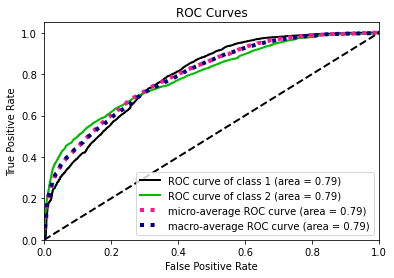

In [650]:
#ROC curve
#!pip install scikit-plot
import scikitplot as skplt
y_true = y_test
y_probas = yhat_prob
skplt.metrics.plot_roc(y_true, y_probas)
plt.show()

After trying different resampling methods, I've chosen **NearMiss** to balance the data as it gives more accuracy than others.

## Decision Tree

As logistic regression gave us the accuracy of 70%, we will try ***Decision Tree Classifier*** to check if it gives us better results!

#### Balancing the dataset using different methods

In [477]:
# NearMiss for undersampling
nr = NearMiss()
nr_X, nr_Y = nr.fit_sample(X,Y)

# OverSampling using SMOTE
#smt = SMOTE()
#smt_X, smt_Y = smt.fit_sample(X,Y)

In [478]:
print(nr_X.shape, nr_Y.shape)
#print(smt_X.shape, smt_Y.shape)

(111618, 57) (111618,)


In [479]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(nr_Y)))
#print('Resampled dataset shape {}'.format(Counter(smt_Y)))

Original dataset shape Counter({1: 124258, 2: 55809})
Resampled dataset shape Counter({1: 55809, 2: 55809})


In [480]:
#After re-sampling
ML_df = pd.concat([nr_X, nr_Y], axis=1)
#ML_df = pd.concat([smt_X, smt_Y], axis=1)
print(ML_df.SEVERITYCODE.value_counts())
print(ML_df.shape)

2    55809
1    55809
Name: SEVERITYCODE, dtype: int64
(111618, 58)


#### Splitting the dataset 

In [555]:
from sklearn.model_selection import train_test_split

X = ML_df.drop('SEVERITYCODE', axis=1)
y = ML_df.SEVERITYCODE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (78132, 57) (78132,)
Test set: (33486, 57) (33486,)


In [556]:
#storing different accuracy scores in a list for different depths
max_depth=[]
accu=[]
for depth in range(1,30):
    SevTree = DecisionTreeClassifier(criterion="entropy", max_depth = depth)
    SevTree.fit(X_train,y_train)
    predTree = SevTree.predict(X_test)
    max_depth.append(depth)
    accu.append(metrics.accuracy_score(y_test, predTree))

Text(18, 0.7281, 'Maximum Accuracy Score')

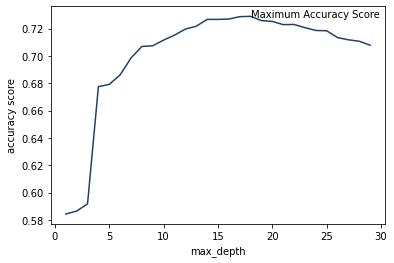

In [575]:
#plotting accuracy scores
plt.plot(max_depth, accu)
plt.xlabel("max_depth")
plt.ylabel("accuracy score")
plt.text(18,0.7281, "Maximum Accuracy Score")

Max Depth of 18 shows better accuracy

<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>SevTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

In [558]:
from sklearn.tree import DecisionTreeClassifier

In [567]:
SevTree = DecisionTreeClassifier(criterion="entropy", max_depth = 18)
SevTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=18)

In [568]:
SevTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=18)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [569]:
predTree = SevTree.predict(X_test)

In [570]:
print (predTree [0:5])
print (y_test [0:5])

[1 1 2 1 2]
54924    1
20131    1
71205    2
28517    1
7150     1
Name: SEVERITYCODE, dtype: int64


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>different evaluation methods</b> from sklearn and check the accuracy of our model.
</div>

In [578]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7281251866451651


In [579]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print("DecisionTree's F1-Score: ", f1_score(y_test, predTree, average='weighted'))
np.mean(cross_val_score(SevTree,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 4))

DecisionTree's Accuracy:  0.7281251866451651
DecisionTree's F1-Score:  0.7249841884639812


-0.2799109199815697

In [580]:
from sklearn.metrics import classification_report
print (classification_report(y_test, predTree))

              precision    recall  f1-score   support

           1       0.69      0.83      0.76     16893
           2       0.78      0.62      0.69     16593

    accuracy                           0.73     33486
   macro avg       0.74      0.73      0.72     33486
weighted avg       0.74      0.73      0.72     33486



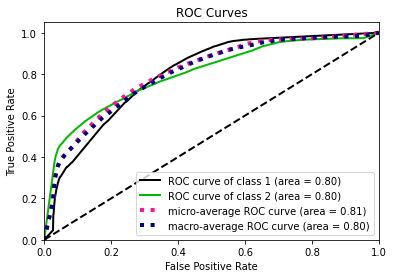

In [581]:
# plotting ROC curve
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test
y_probas_tree = SevTree.predict_proba(X_test)
skplt.metrics.plot_roc(y_true, y_probas_tree)
plt.show()

After using different *Sampling methods* and trying different *Criterion & Depths*, **NearMiss** for sampling and **Entropy** criterion with depth of **18** proved to be better!

<hr>

<div id="Conclusion">
    <h2>Conclusion</h2>
</div>

It is concluded that **Decision Tree Classifier** performed slightly better with the accuracy of **72.8%**, Whereas **Logistic Regression's** accuracy was **70%**.
Overall, with the accuracy of 70-72% it is a good ML Model.